In [ ]:
!pip install pytorch-lightning --quiet
!pip install pytorch-lightning-bolts --quiet

     |████████████████████████████████| 696kB 5.8MB/s 
     |████████████████████████████████| 829kB 11.3MB/s 
     |████████████████████████████████| 102kB 8.3MB/s 
     |████████████████████████████████| 276kB 18.4MB/s 
     |████████████████████████████████| 1.3MB 19.6MB/s 
     |████████████████████████████████| 296kB 33.7MB/s 
     |████████████████████████████████| 143kB 17.6MB/s 
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=3fd101cbd1d5a444622c14ba60fb92ce70528b4697b52b0c45453ba83d999f37
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=d9949cb107fbf1d4dc741debd02c2de67e45985c274f296bf0d6516bfb004ae3
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 

In [ ]:
import torch, torchvision
from torch import nn, optim
from torch.autograd import Variable
import pytorch_lightning as pl
import pl_bolts

/usr/local/lib/python3.6/dist-packages/pl_bolts/utils/warnings.py:32: UserWarning: You want to use `wandb` which is not installed yet, install it with `pip install wandb`.
  f' install it with `pip install {pypi_name}`.' + extra_text


In [ ]:
T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

mnist_data_train = torchvision.datasets.MNIST('mnist_data',transform=T, train=True, download=True)
mnist_train_dataloader = torch.utils.data.DataLoader(mnist_data_train, batch_size=128)

mnist_data_test = torchvision.datasets.MNIST('mnist_data',transform=T, train=False, download=True)
mnist_test_dataloader = torch.utils.data.DataLoader(mnist_data_test, batch_size=128)


In [ ]:
class MnetLightning(pl.LightningModule):
  def __init__(self):
    super(MnetLightning,self).__init__()
    self.metrics = pl.metrics.Accuracy()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100,50)
    self.final_layer = nn.Linear(50, 10)

    self.relu = nn.ReLU()

    self.loss = nn.CrossEntropyLoss()

  def forward(self, images):

    x = images.view(-1, 28*28)

    x = self.linear1(x)
    x = self.relu(x)

    x = self.linear2(x)
    x = self.relu(x)

    x = self.final_layer(x)

    return x

  def configure_optimizers(self):
    params = self.parameters()
    optimizer = optim.Adam(params=params, lr = 0.001)
    return optimizer

  def training_step(self, batch, batch_idx):
    images, labels = batch
    output = self(images) 
    loss = self.loss(output, labels)
    accuracy = self.metrics(output,labels)
    self.log('accuracy', accuracy, prog_bar=True)
    return {"loss":loss, "accuracy":accuracy}



In [ ]:
model = MnetLightning()
trainer = pl.Trainer(max_epochs=1, progress_bar_refresh_rate=30)
trainer.fit(model, train_dataloader=mnist_train_dataloader)

GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name        | Type             | Params
-------------------------------------------------
0 | metrics     | Accuracy         | 0     
1 | linear1     | Linear           | 78.5 K
2 | linear2     | Linear           | 5.0 K 
3 | final_layer | Linear           | 510   
4 | relu        | ReLU             | 0     
5 | loss        | CrossEntropyLoss | 0     
-------------------------------------------------
84.1 K    Trainable params
0         Non-trainable params
84.1 K    Total params


1

In [ ]:
! ls lightning_logs

version_0  version_2  version_4  version_6  version_8
version_1  version_3  version_5  version_7


In [ ]:
!ls lightning_logs/version_8/checkpoints

'epoch=0-step=468.ckpt'


In [ ]:
PATH = 'lightning_logs/version_7/checkpoints/epoch=2-step=1406.ckpt'
mnist_model = model.load_from_checkpoint(PATH)
mnist_model.eval()

MnetLightning(
  (metrics): Accuracy()
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=50, bias=True)
  (final_layer): Linear(in_features=50, out_features=10, bias=True)
  (relu): ReLU()
  (loss): CrossEntropyLoss()
)

In [ ]:
# predicted_result, actual_result = [], []
predicted_result, actual_result = torch.tensor([]), torch.tensor([])
n_correct = 0
n_samples = 0
#let's loop it over single iteration and print the shape and also data
for i, (features,labels) in enumerate(mnist_test_dataloader):
  outputs = mnist_model(features)
  # max returns (value ,index)
  _, predicted = torch.max(outputs.data, 1)
  n_samples += labels.size(0)
  n_correct += (predicted == labels).sum().item()

acc = 100.0 * n_correct / n_samples
print(f'Accuracy on test images: {acc} %')


Accuracy on test images: 95.67 %


In [ ]:
features[-1]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0314, 0.4588, 0.9961, 0.8627, 0.3490, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0510,
          0.3725, 0.8314, 0.9922, 0.9922, 0.9922, 0.6157,

In [ ]:
# print(pl.metrics.Accuracy(predicted_result, actual_result))
predicted_result, actual_result = torch.tensor([1,2,3]), torch.tensor([4,5,6])


res=torch.cat([predicted_result, actual_result], dim=0)
res

tensor([1, 2, 3, 4, 5, 6])

In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()


images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [ ]:
a = torch.tensor([1,2,3])
print(a.shape)
b = torch.tensor([4,5,6])
print(b.shape)
# b = b.unsqueeze(0)
print(b.shape)
c = torch.cat([a, b], dim=0)
print(c.shape)
c

torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([6])


tensor([1, 2, 3, 4, 5, 6])

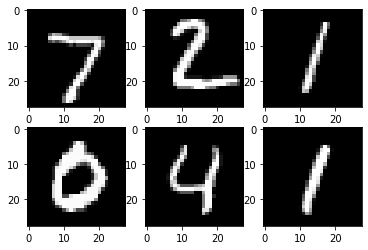

Epoch [1/2], Step [100/600], Loss: 0.3633
Epoch [1/2], Step [200/600], Loss: 0.2753
Epoch [1/2], Step [300/600], Loss: 0.2071
Epoch [1/2], Step [400/600], Loss: 0.1715
Epoch [1/2], Step [500/600], Loss: 0.1204
Epoch [1/2], Step [600/600], Loss: 0.1749
Epoch [2/2], Step [100/600], Loss: 0.1125
Epoch [2/2], Step [200/600], Loss: 0.1081
Epoch [2/2], Step [300/600], Loss: 0.0805
Epoch [2/2], Step [400/600], Loss: 0.0521
Epoch [2/2], Step [500/600], Loss: 0.1428
Epoch [2/2], Step [600/600], Loss: 0.1183
> <ipython-input-92-ae349612f35e>(93)<module>()
-> for images, labels in test_loader:
(Pdb) predicted
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9])
(Pdb) labels
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0,

BdbQuit: ignored

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        import pdb;pdb.set_trace()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')